# Facenet Tutorial

Hey guys! Today we're going to use facnet_pytorch to help you with some handy-dandy face recognition. Facenet-pytorch is a [PyTorch](https://pytorch.org/) implementation of [this paper](https://arxiv.org/abs/1503.03832) *FaceNet: A unified Embedding for Face Recognition and Clustering*, which achieves state-of-the-art accuracy in face recognition.

**Why are we using facenet-pytorch?** You might be thinking, why not just work on another neural net to learn to detect and recognize faces? Two things: data, and time. In order to achieve a model with accuracy as good as facenet-pytorch, we'd need tons of labeled data that's pretty hard to come by. And, to create and train a model of that magnitude would take much more time than we have avaliable. However, you all already know the basic concepts of what's going on under the hood, and it's more convienent and accurate to use this model.

First, you're going to want to clone and do the whole `python setup.py develop` thing to use the facenet models - you can find the repo [here](https://github.com/CogWorksBWSI/facenet_models).

Make sure you've already run through the Camera Tutorial module to set up your camera and to check if the ports are correct, etc! (you can find Camera [here](https://github.com/LLCogWorks2018/Camera) if you haven't set it up yet) 

In [4]:
# run this cell to setup matplotlib, and also import the very important take_picture function from camera!
%matplotlib inline
import matplotlib.pyplot as plt
from camera import take_picture
import numpy as np
from PIL import Image

Let's take a picture to test this out!

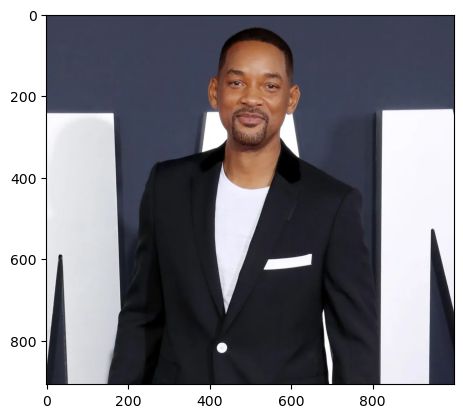

In [5]:
fig,ax = plt.subplots()
"""pic = take_picture()"""
pic = Image.open(r'C:/Users/kavya/Documents/GitHub/imageprog/pics/test/Will_Smith_test.jpg')  
pic_arr = np.array(pic)
ax.imshow(pic_arr)

Hello gorgeous!! Now, let's see if we can detect any faces.

In [6]:
from facenet_models import FacenetModel

model = FacenetModel()

In [7]:
boxes, probabilities, landmarks = model.detect(pic_arr)

print(f"Number of faces detected: {len(boxes)}")

Number of faces detected: 1


Heck yeah, we got a face, which is a step in the right direction. The facenet-pytorch model gives us a set of boxes containing the face regions of our image and a set of landmarks, which correspond to specific facial attributes: your eyes, corners of your mouth, and nose. Let's visualize those features now!

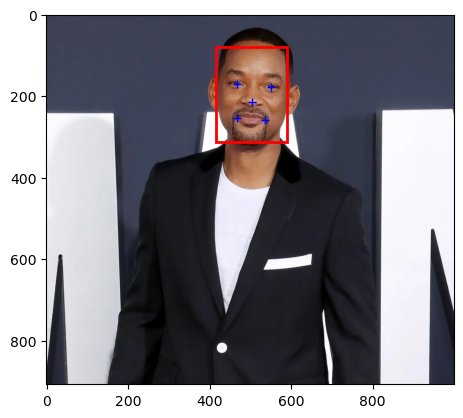

In [8]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()
ax.imshow(pic_arr)


for box, prob, landmark in zip(boxes, probabilities, landmarks):
    # draw the box on the screen
    ax.add_patch(Rectangle(box[:2], *(box[2:] - box[:2]), fill=None, lw=2, color="red"))

    # Get the landmarks/parts for the face in box d.
    # Draw the face landmarks on the screen.
    for i in range(len(landmark)):
        ax.plot(landmark[i, 0], landmark[i, 1], "+", color="blue")

We're able to find faces in an image! However, in order to match names with faces, we need to be able to distinguish *between* faces. Luckily, our model has this cool feature called a "face descriptor vector". Think of a face descriptor as a numerical representation of the intricacies of your face. We'll tell the model where the faces are by passing in the boxes and it will give us the face descriptors, which are 512-dimensional vectors encoding a person's identity.

In [9]:
# let's take a look as to what the descriptor is!!
descriptor = model.compute_descriptors(pic_arr, boxes)
print(descriptor.shape)
print(descriptor)

(1, 512)
[[-1.34103978e-03 -1.13536986e-02 -5.86228035e-02 -6.79865554e-02
  -8.28769989e-03 -3.79908271e-02  3.72334644e-02  2.32779272e-02
  -3.52134705e-02 -3.66741139e-03  1.07404254e-02 -1.13016658e-01
   1.81358792e-02 -8.44684020e-02  2.44193655e-02 -2.60642264e-02
  -1.53911123e-02 -2.44786758e-02  1.27670774e-02 -5.41691203e-03
  -8.25427920e-02  9.29889381e-02 -1.55086778e-02 -1.38414735e-02
  -2.74793226e-02  6.50681034e-02 -2.98018865e-02 -1.01592384e-01
   2.86844671e-02 -1.71665754e-02 -8.90238509e-02  6.07769974e-02
  -3.96820828e-02  3.03955600e-02  4.04125936e-02  6.44580694e-03
  -6.15790188e-02 -2.64968406e-02  6.93317642e-03 -1.48283765e-02
   6.09486457e-03  3.68881039e-02  2.85253748e-02 -3.19489762e-02
  -2.47699693e-02 -1.37325854e-03 -8.70761573e-02  2.38463562e-02
  -7.94746950e-02 -1.15615381e-02 -3.22853215e-02  2.71313265e-02
  -2.55275331e-02  2.95966212e-03 -1.40815778e-02  6.18173601e-03
  -3.47179966e-03 -5.71347177e-02  1.37560349e-02  6.33657053e-02
 

Woah, that's pretty cool!! As you can see, the **descriptor vector** looks like a pretty standard NumPy array. Each descriptor vector is different. Even if we take descriptor vectors of the same face in two different pictures, they'll be slightly different. Now, the problem lies in how we can distinguish between the minute details in faces of the same people and the large differences in other faces. 

There's a pretty tried and true formula for finding this out, and it should look a little familiar. We can calculate the distance between each point in the vector, add it all up, and see if it's greater or less than a certain threshold value that we can determine ourselves.

We will use "cosine distance" to measure the similarity between two descriptors.

\begin{equation}
\text{cosine_dist}(\vec{d}_i, \vec{d}_j) = 1- \frac{\vec{d}_i \cdot \vec{d}_j}{|\vec{d}_i||\vec{d}_j|}
\end{equation}

Alright, now it's your turn! Grab a friend and take a picture. As a note, you'll get two detections, two shapes, and two descriptor values, so remember to account for them both. Try seeing how different your faces are. Then, maybe take two pictures of yourself and see the difference between the two. Try to come up with a good threshold value between determining different people. 

Have fun!

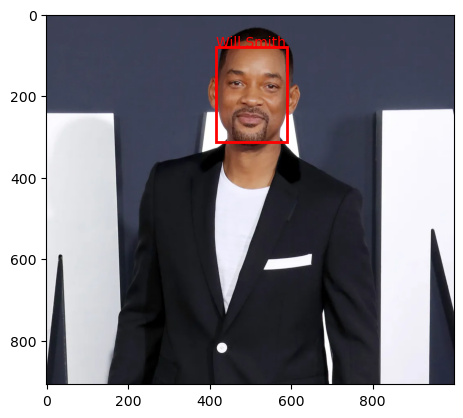

In [17]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()
ax.imshow(pic_arr)


for box, prob, landmark in zip(boxes, probabilities, landmarks):
    # draw the box on the screen
    ax.add_patch(Rectangle(box[:2], *(box[2:] - box[:2]), fill=None, lw=2, color="red"))
    plt.text(box[:2][0], box[:2][1], 'Will Smith', color="red")